In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [174]:
df=pd.read_csv("G:\\ML\\Brain Stroke\\brain_stroke.csv")

# Exploratory Data Analysis

In [175]:
df['ever_married'] = [ 0 if i !='Yes' else 1 for i in df['ever_married'] ]
df['gender'] = [0 if i != 'Female' else 1 for i in df['gender']]

In [176]:
df=pd.get_dummies(df,columns=['work_type','Residence_type','smoking_status'])

In [177]:
df.rename(columns={'work_type_Self-employed':'work_type_Self_employed',
                  'smoking_status_formerly smoked':'smoking_status_formerly_smoked',
                  'smoking_status_never smoked':'smoking_status_never_smoked'},inplace=True)

In [178]:
x=df.drop('stroke',axis=1)
y=df.stroke

0    4733
1     248
Name: stroke, dtype: int64

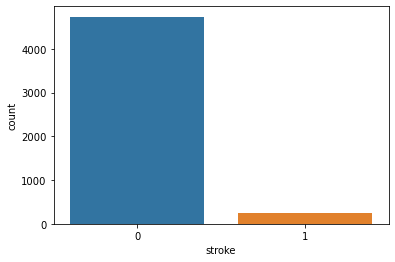

In [179]:
sns.countplot(x=y,data=df)
df.stroke.value_counts()

There is an oversampling in the dataset. There is a big difference between those who do not have a stroke and those who do.



In [180]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

1    4733
0    4733
Name: stroke, dtype: int64

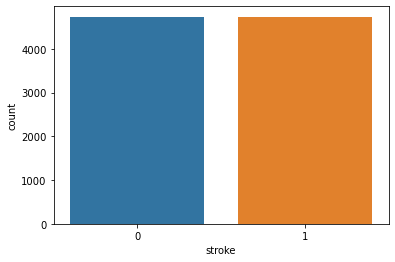

In [181]:
sns.countplot(x=y,data=df)
y.value_counts()

Now we have a balanced dataset


In [182]:
## merging all data
x = pd.DataFrame(x)
y= pd.Series(y)
df=x.merge(y,left_index=True, right_index=True)
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,0,67.000000,0,1,1,228.690000,36.600000,0,1,0,0,0,1,0,1,0,0,1
1,0,80.000000,0,1,1,105.920000,32.500000,0,1,0,0,1,0,0,0,1,0,1
2,1,49.000000,0,0,1,171.230000,34.400000,0,1,0,0,0,1,0,0,0,1,1
3,1,79.000000,1,0,1,174.120000,24.000000,0,0,1,0,1,0,0,0,1,0,1
4,0,81.000000,0,0,1,186.210000,29.000000,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,0,56.701440,0,0,1,193.664443,36.261502,0,1,0,0,0,0,0,1,0,0,1
9462,0,64.818001,1,0,1,247.987300,39.253717,0,1,0,0,0,0,0,0,0,0,1
9463,0,71.733450,0,0,1,238.783981,26.793380,0,1,0,0,0,0,0,0,0,0,1
9464,0,41.686705,0,0,0,102.592879,30.570310,0,1,0,0,1,0,0,0,0,0,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          9466 non-null   int64  
 1   age                             9466 non-null   float64
 2   hypertension                    9466 non-null   int64  
 3   heart_disease                   9466 non-null   int64  
 4   ever_married                    9466 non-null   int64  
 5   avg_glucose_level               9466 non-null   float64
 6   bmi                             9466 non-null   float64
 7   work_type_Govt_job              9466 non-null   uint8  
 8   work_type_Private               9466 non-null   uint8  
 9   work_type_Self_employed         9466 non-null   uint8  
 10  work_type_children              9466 non-null   uint8  
 11  Residence_type_Rural            9466 non-null   uint8  
 12  Residence_type_Urban            94

In [184]:
df.shape

(9466, 18)

<AxesSubplot:>

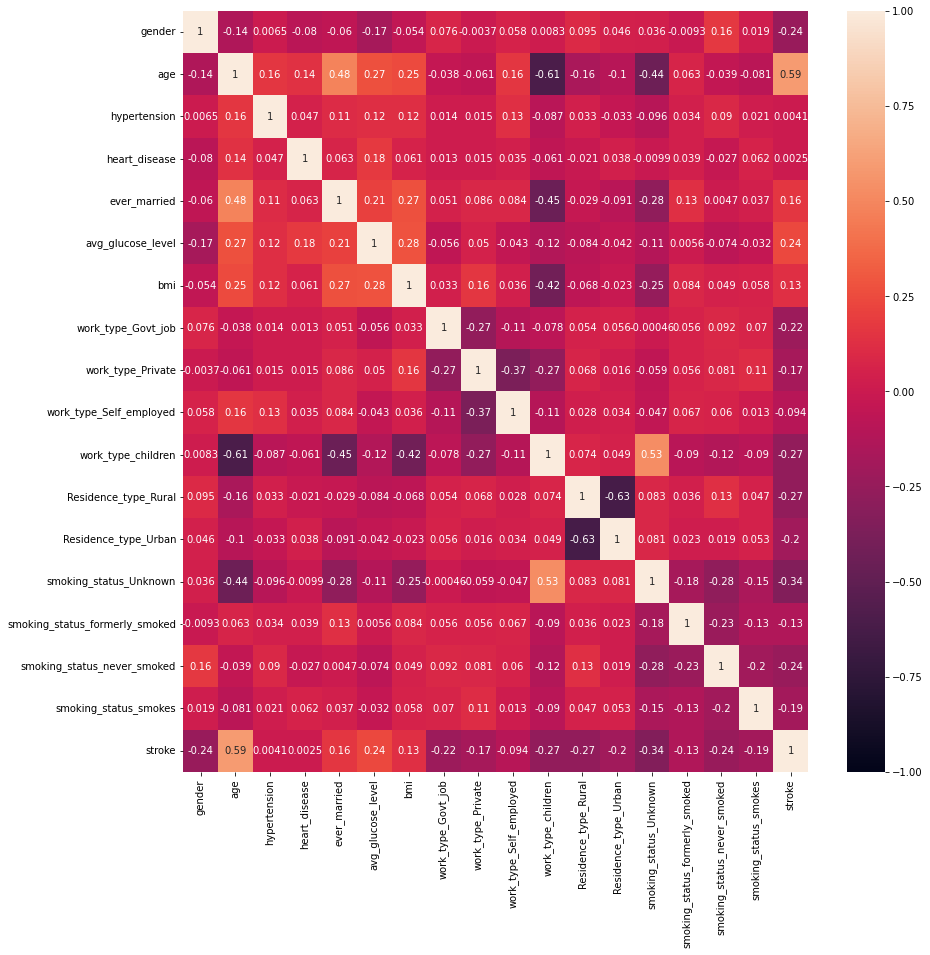

In [185]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

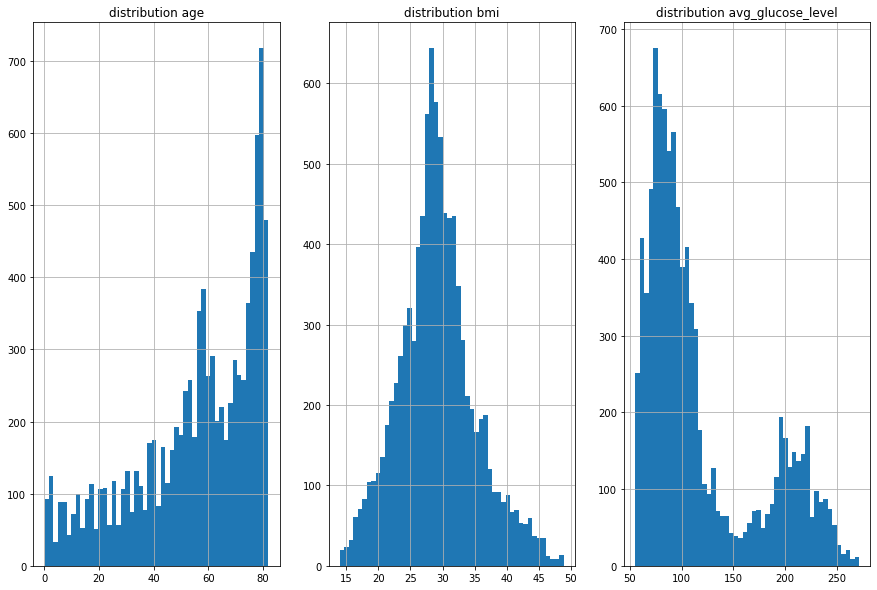

In [186]:
x=df[['age','bmi','avg_glucose_level']]
y=['age','bmi','avg_glucose_level']
subplots=[1,2,3]
for i,n,m in zip (x,subplots,y):
        plt.subplot(1,3,n)
        plt.title(f'distribution {m}')
        x[i].hist(bins=50,figsize=(15,10))
plt.show()

# stroke with hypertension case

In [188]:
s=[0,1]
for i in s:
    print(df[df.hypertension==i].stroke.value_counts())

0    4320
1    4309
Name: stroke, dtype: int64
1    424
0    413
Name: stroke, dtype: int64


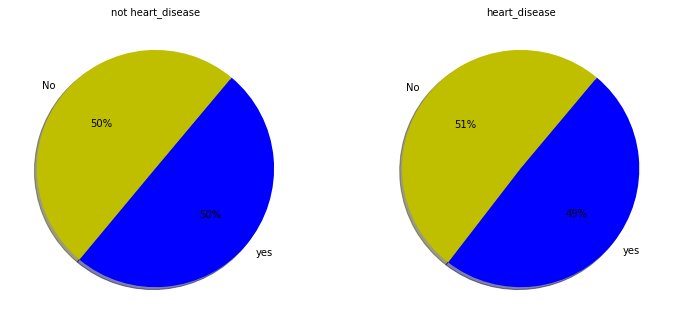

In [189]:
x=[0,1]
y=['not heart_disease','heart_disease']
subplots=[1,2]
plt.figure(figsize=(12,12))
for i,n,m in zip (x,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}',fontsize=10)
    plt.pie(df[df.hypertension==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['y','b']);

# stroke with heart_disease case

In [187]:
s=[0,1]
for i in s:
    print(df[df.heart_disease==i].stroke.value_counts())

0    4505
1    4500
Name: stroke, dtype: int64
1    233
0    228
Name: stroke, dtype: int64


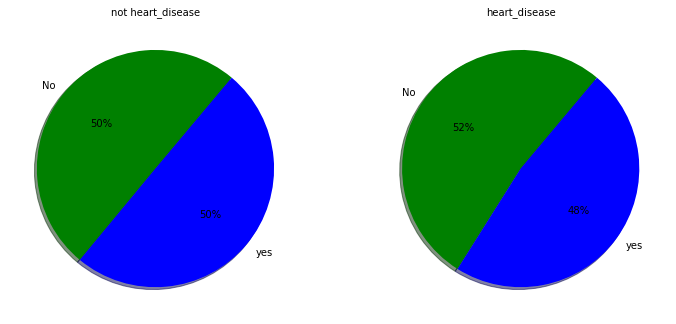

In [172]:
x=[0,1]
y=['not heart_disease','heart_disease']
subplots=[1,2]
plt.figure(figsize=(12,12))
for i,n,m in zip (x,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}',fontsize=10)
    plt.pie(df[df.heart_disease==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['g','b']);

# stroke with married case

In [190]:
s=[0,1]
for i in s:
    print(df[df.ever_married==i].stroke.value_counts())

0    1672
1     983
Name: stroke, dtype: int64
1    3750
0    3061
Name: stroke, dtype: int64


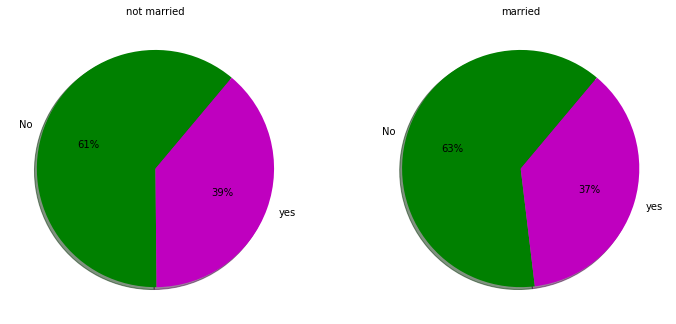

In [191]:
x=[0,1]
y=['not married','married']
subplots=[1,2]
plt.figure(figsize=(12,12))
for i,n,m in zip (x,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}',fontsize=10)
    plt.pie(df[df.gender==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['g','m']);

# stroke with male & female 

In [192]:
# ('0=male,1=female')
s=[0,1]
for i in s:
    print(df[df.gender==i].stroke.value_counts())

1    3109
0    1966
Name: stroke, dtype: int64
0    2767
1    1624
Name: stroke, dtype: int64


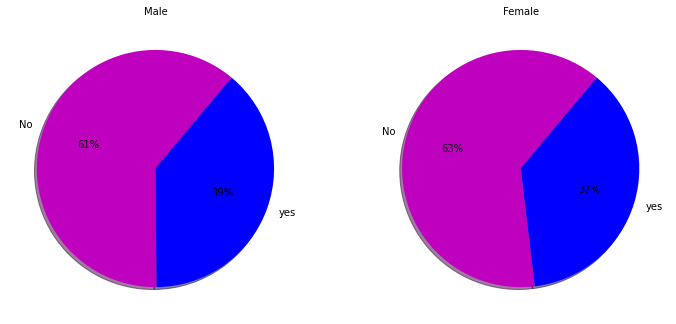

In [193]:
x=[0,1]
y=['Male','Female']
subplots=[1,2]
plt.figure(figsize=(12,12))
for i,n,m in zip (x,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}',fontsize=10)
    plt.pie(df[df.gender==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['m','b']);

#  stroke in Urban & Rural 

In [159]:
# [0=out Urban,1=in Urban],[0=out Rural,1=in Rural]
print("## the cases in urban & rural ##:\n")
Urban=[0,1]
place=[' Urban: ','Rural: ']
for i,n in zip (Urban,place):
    
    print(f'{n}',df[df.Residence_type_Urban==i].stroke.value_counts())

## the cases in urban & rural ##:

 Urban:  1    3284
0    2336
Name: stroke, dtype: int64
Rural:  0    2397
1    1449
Name: stroke, dtype: int64


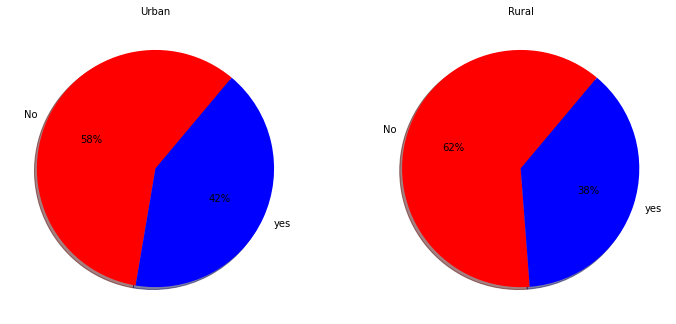

In [160]:
x=[0,1]
y=['Urban','Rural']
subplots=[1,2]
plt.figure(figsize=(12,12))
for i,n,m in zip (x,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}',fontsize=10)
    plt.pie(df[df.Residence_type_Urban==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['m','b']);

# strok with type work 

In [161]:
x=[0,1]
job=['not Govt job: ','Govt job: ']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.work_type_Govt_job==i].stroke.value_counts(),'\n') 

x=[0,1]
job=['not children: ','children: ']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.work_type_children==i].stroke.value_counts(),'\n') 
    

x=[0,1]
job=['Private: ','not Private:']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.work_type_Private==i].stroke.value_counts(),'\n')    

    
x=[0,1]
job=[' not Self-employed  : ','Self-employed  : ']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.work_type_Self_employed==i].stroke.value_counts(),'\n')    
    

not Govt job: 
 1    4646
0    4122
Name: stroke, dtype: int64 

Govt job: 
 0    611
1     87
Name: stroke, dtype: int64 

not children: 
 1    4726
0    4062
Name: stroke, dtype: int64 

children: 
 0    671
1      7
Name: stroke, dtype: int64 

Private: 
 1    2885
0    2021
Name: stroke, dtype: int64 

not Private:
 0    2712
1    1848
Name: stroke, dtype: int64 

 not Self-employed  : 
 1    4299
0    3994
Name: stroke, dtype: int64 

Self-employed  : 
 0    739
1    434
Name: stroke, dtype: int64 



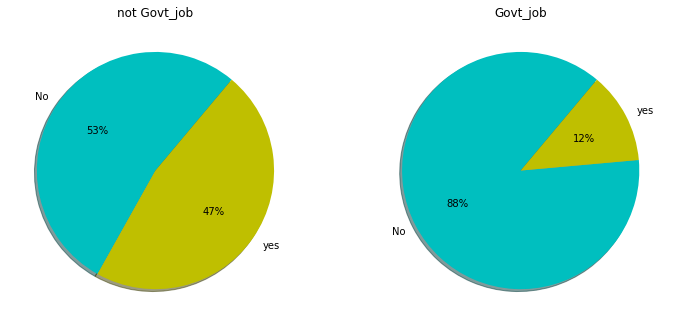

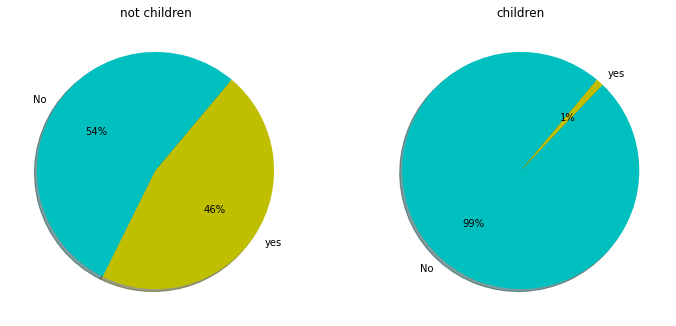

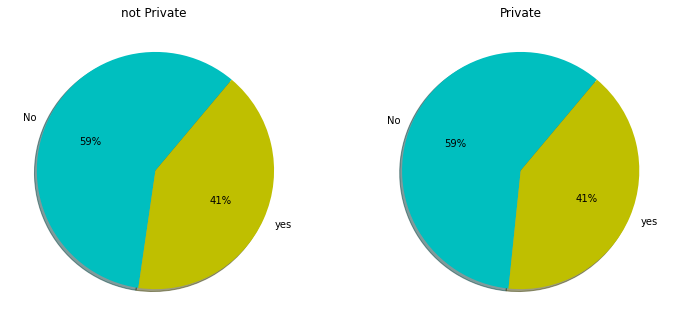

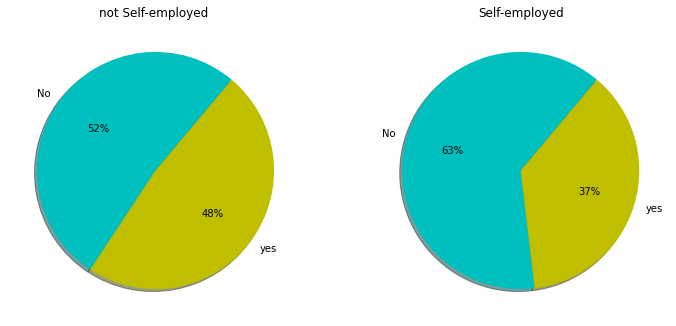

In [162]:
plt.figure(figsize=(12,12))
work=[0,1]
y=['not Govt_job','Govt_job']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.work_type_Govt_job==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['c','y'])
    
plt.figure(figsize=(12,12))
work=[0,1]
y=['not children','children']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.work_type_children==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['c','y'])
    
    
plt.figure(figsize=(12,12))
work=[0,1]
y=['not Private ','Private']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.work_type_Private==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['c','y'])  
    
plt.figure(figsize=(12,12))
work=[0,1]
y=['not Self-employed ','Self-employed']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.work_type_Self_employed==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['c','y'])  
    

# strock with smoking cases

In [163]:
x=[0,1]
job=['not Unknown: ','Unknown: ']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.smoking_status_Unknown==i].stroke.value_counts(),'\n') 

x=[0,1]
job=['not smokes: ','smokes: ']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.smoking_status_smokes==i].stroke.value_counts(),'\n') 
    

x=[0,1]
job=['not formerly_smoked: ',' formerly_smoked:']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.smoking_status_formerly_smoked==i].stroke.value_counts(),'\n')    

    
x=[0,1]
job=[' not never_smoked  : ','never_smoked  : ']
for i,n in zip (x,job):
    print(f'{n}\n',df[df.smoking_status_never_smoked==i].stroke.value_counts(),'\n')   

not Unknown: 
 1    4497
0    3280
Name: stroke, dtype: int64 

Unknown: 
 0    1453
1     236
Name: stroke, dtype: int64 

not smokes: 
 1    4542
0    3999
Name: stroke, dtype: int64 

smokes: 
 0    734
1    191
Name: stroke, dtype: int64 

not formerly_smoked: 
 1    4325
0    3936
Name: stroke, dtype: int64 

 formerly_smoked:
 0    797
1    408
Name: stroke, dtype: int64 

 not never_smoked  : 
 1    3948
0    2984
Name: stroke, dtype: int64 

never_smoked  : 
 0    1749
1     785
Name: stroke, dtype: int64 



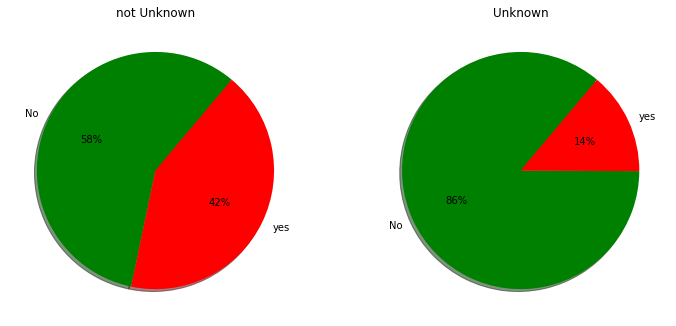

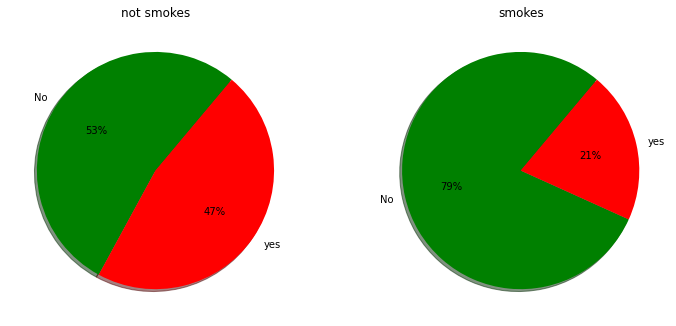

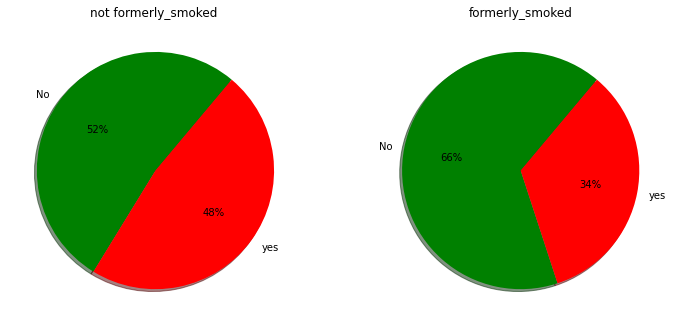

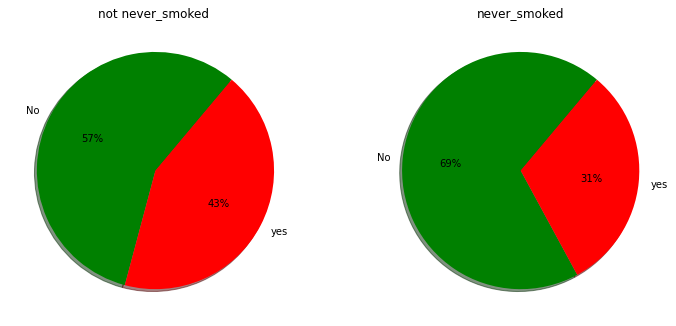

In [167]:
plt.figure(figsize=(12,12))
work=[0,1]
y=['not Unknown','Unknown']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.smoking_status_Unknown==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['g','r'])
    
plt.figure(figsize=(12,12))
work=[0,1]
y=['not smokes','smokes']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.smoking_status_smokes==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['g','r'])
    
    
plt.figure(figsize=(12,12))
work=[0,1]
y=['not formerly_smoked ','formerly_smoked']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.smoking_status_formerly_smoked==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['g','r'])  
    
plt.figure(figsize=(12,12))
work=[0,1]
y=['not never_smoked ','never_smoked']
subplots=[1,2]
for i,n,m in zip (work,subplots,y):
    plt.subplot(2,2,n)
    plt.title(f'{m}')
    plt.pie(df[df.smoking_status_never_smoked==i].stroke.value_counts(),
        labels=('No','yes'),
        autopct='%1.0f%%',
        startangle=50,
        shadow=True,
        colors=['g','r'])  

# ML

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve

# split the dataset

In [195]:
x=df.drop('stroke',axis=1)
y=df['stroke']

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state=42)

# models

# svm

In [254]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

svc_clf=SVC()
param=[{'kernel':['linear', 'poly', 'rbf'],'C':[1,2,3]}]
rnd_search_cv = GridSearchCV(svc_clf, param,cv=5)
rnd_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3], 'kernel': ['linear', 'poly', 'rbf']}])

In [255]:
print(rnd_search_cv.best_estimator_)

SVC(C=1, kernel='linear')


In [256]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc_clf=make_pipeline(StandardScaler(),SVC(C=1, kernel='linear'))

In [257]:
svc_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [261]:
print('Training-set accuracy score:',cross_val_score(svc_clf, x_train, y_train,cv=5,
                                                    scoring='accuracy').mean())

Training-set accuracy score: 0.9400424639557748


In [262]:
print('Testing-set accuracy score:',cross_val_score(svc_clf, x_test, y_test,cv=5,
                                                    scoring='accuracy').mean())

Testing-set accuracy score: 0.9413885049768954


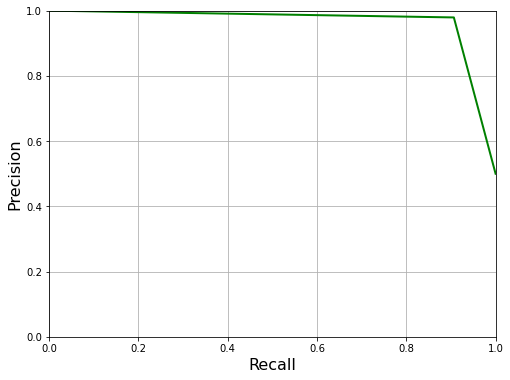

In [237]:
y_train_predict = cross_val_predict(log_clf, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_predict)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

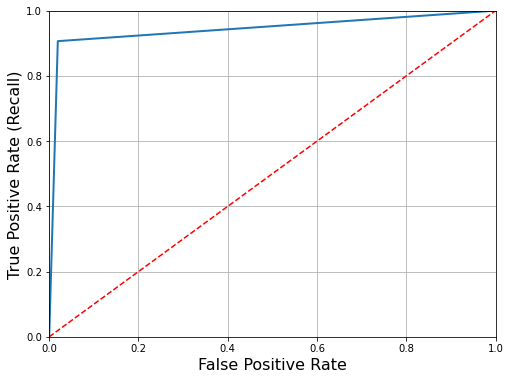

In [242]:
fpr_svc, tpr_svc, thresholds = roc_curve(y_train, y_train_predict)
def plot_roc_curve(fpr_svc, tpr_svc, label=None):
    plt.plot(fpr_svc, tpr_svc, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_svc, tpr_svc)
plt.show()

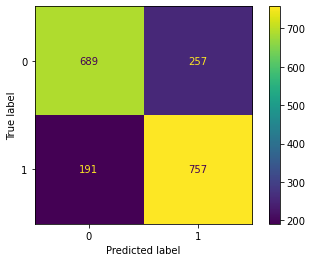

In [239]:
y_test_predict=cross_val_predict(svc_clf,x_test,y_test,cv=5)
cm=confusion_matrix(y_test,y_test_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
acc_svc_clf = metrics.accuracy_score(y_test,y_test_predict)
acc_svc_clf

# Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(penalty='l2',max_iter=1000,C=1)
log_clf.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [215]:
print('Training-set accuracy score:',cross_val_score(log_clf, x_train, y_train,cv=5,
                                                    scoring='accuracy').mean())

Training-set accuracy score: 0.9436085642910396


In [216]:
print('Training-set accuracy score:',cross_val_score(log_clf, x_test, y_test,cv=5,
                                                    scoring='accuracy').mean())

Training-set accuracy score: 0.9408566123605702


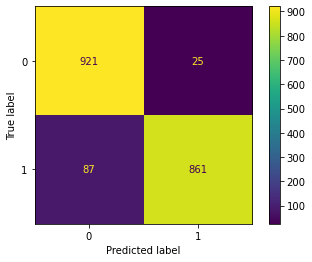

In [217]:
y_test_predict=cross_val_predict(log_clf,x_test,y_test,cv=5)
cm=confusion_matrix(y_test,y_test_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [218]:
from sklearn import metrics
acc_log_clf = metrics.accuracy_score(y_test,y_test_predict)
acc_log_clf

0.9408658922914467

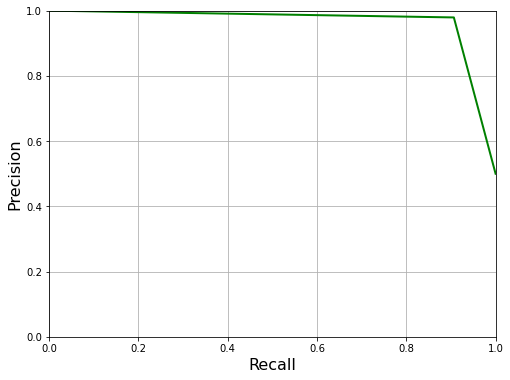

In [220]:
y_train_predict = cross_val_predict(log_clf, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_predict)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

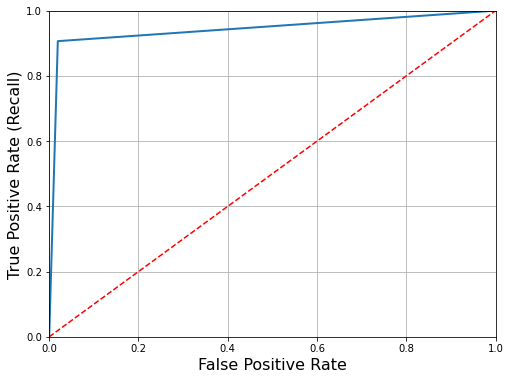

In [222]:
fpr_log, tpr_log, thresholds = roc_curve(y_train, y_train_predict)
def plot_roc_curve(fpr_log, tpr_log, label=None):
    plt.plot(fpr_log, tpr_log, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_log, tpr_log)
plt.show()

# Random Forest Classifier

In [223]:
forest_clf=RandomForestClassifier(n_estimators=100,criterion="gini")
forest_clf.fit(x_train,y_train)
y_pred=forest_clf.predict(x_test)

In [224]:
print('Training-set accuracy score:',cross_val_score(forest_clf, x_train, y_train,cv=5,
                                                    scoring='accuracy').mean())

Training-set accuracy score: 0.9685685635934795


In [225]:
print('Training-set accuracy score:',cross_val_score(forest_clf, x_test, y_test,cv=5,
                                                    scoring='accuracy').mean())

Training-set accuracy score: 0.943502115006073


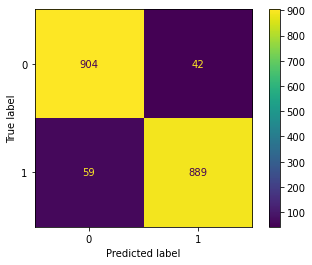

In [226]:
y_test_predict=cross_val_predict(forest_clf,x_test,y_test,cv=5)
cm=confusion_matrix(y_test,y_test_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [227]:
from sklearn import metrics
acc_forest_clf = metrics.accuracy_score(y_test,y_test_predict)
acc_forest_clf

0.9466737064413939

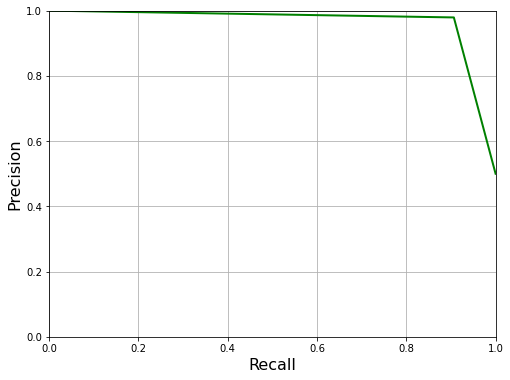

In [228]:
y_train_predict = cross_val_predict(log_clf, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_predict)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

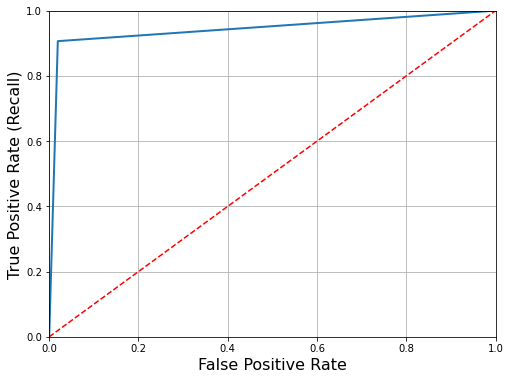

In [229]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train, y_train_predict)
def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

comparing between models

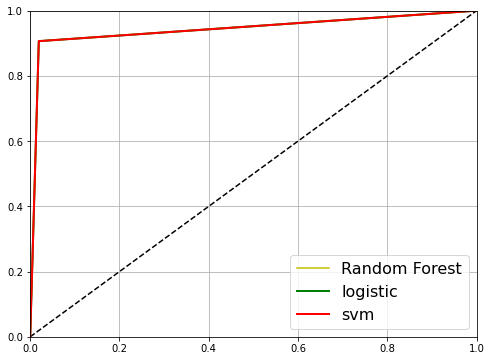

In [265]:
def plot_roc_curve(fpr_forest, tpr_forest,fpr_log,tpr_log,fpr_svc, tpr_svc,label=None):
    plt.figure(figsize=(8, 6))
    plt.plot([0,1],[0, 1], 'k--') # dashed diagonal
    plt.plot(fpr_forest, tpr_forest,'y' ,label="Random Forest")
    plt.plot(fpr_log, tpr_log,'g',linewidth=2, label='logistic')
    plt.plot(fpr_svc, tpr_svc,'r',linewidth=2, label='svm')

    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=16)
plot_roc_curve(fpr_forest,tpr_forest,fpr_log,tpr_log,fpr_svc, tpr_svc)
plt.show()